### Detection Efficiency around Fornax

In [7]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

In [8]:
import healpy as hp
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

### Import the catalog of Dwarf Galaxies from the NGFS 

In [9]:
# Load the inner region
RA_F_in, DEC_F_in =  np.loadtxt("Fornax_inner_photo.dat",  unpack=3, usecols=[3,4])
type_F_in = np.loadtxt("Fornax_inner_struct.dat",dtype='str', unpack=3, usecols=[3])

# Load the outer region
RAh, RAm, RAs, DEd, DEm, DEs =  np.loadtxt("Fornax_outer.dat",  unpack=3, usecols=[1,2,3,4,5,6])
type_F_out = np.loadtxt("Fornax_outer.dat",dtype='str',unpack=3, usecols=[12])

In [10]:
RA_F_out = RAh*15.0 + RAm/4.0 + RAs/240.0  # Right ascension in degrees for the Muñoz et. al. objects aroud Fornax
DEC_F_out = - (abs(DEd) + DEm/60.0 + DEs/3600.0)

In [11]:
RA_F = np.concatenate((RA_F_in,RA_F_out))
DEC_F = np.concatenate((DEC_F_in,DEC_F_out))
type_F = np.concatenate((type_F_in,type_F_out))

print(len(RA_F))

print(len(RA_F[type_F=='x']))
print(len(RA_F[type_F=='o']))

642
461
181


In [12]:
DES_dat = fits.open('Fornax_around.fits')

ra_all = DES_dat[1].data['RA']
dec_all = DES_dat[1].data['DEC']
A_IMAGE = DES_dat[1].data['A_IMAGE']
B_IMAGE = DES_dat[1].data['B_IMAGE']
MAG_AUTO_G = DES_dat[1].data['MAG_AUTO_G']
FLUX_RADIUS_G = 0.263*DES_dat[1].data['FLUX_RADIUS_G']
MU_EFF_MODEL_G = DES_dat[1].data['MU_EFF_MODEL_G']
MU_MAX_G = DES_dat[1].data['MU_MAX_G']
MU_MAX_MODEL_G = DES_dat[1].data['MU_MAX_MODEL_G']
MU_MEAN_MODEL_G = DES_dat[1].data['MU_MEAN_MODEL_G']
MAG_AUTO_R = DES_dat[1].data['MAG_AUTO_R']
FLUX_RADIUS_R = 0.263*DES_dat[1].data['FLUX_RADIUS_R']
MU_EFF_MODEL_R = DES_dat[1].data['MU_EFF_MODEL_R']
MU_MAX_R = DES_dat[1].data['MU_MAX_R']
MU_MAX_MODEL_R = DES_dat[1].data['MU_MAX_MODEL_R']
MU_MEAN_MODEL_R = DES_dat[1].data['MU_MEAN_MODEL_R']
MAG_AUTO_I = DES_dat[1].data['MAG_AUTO_I']
FLUX_RADIUS_I = 0.263*DES_dat[1].data['FLUX_RADIUS_I']
MU_EFF_MODEL_I = DES_dat[1].data['MU_EFF_MODEL_I']
MU_MAX_I = DES_dat[1].data['MU_MAX_I']
MU_MAX_MODEL_I = DES_dat[1].data['MU_MAX_MODEL_I']
MU_MEAN_MODEL_I = DES_dat[1].data['MU_MEAN_MODEL_I']
SPREADERR_MODEL_I = DES_dat[1].data['SPREADERR_MODEL_I']
SPREAD_MODEL_I = DES_dat[1].data['SPREAD_MODEL_I']

# Perform the star-galaxy separation cut
gal_star_cut = (SPREAD_MODEL_I+ (5./3.0)*SPREADERR_MODEL_I  > 0.007)

ra_all = ra_all[gal_star_cut]
dec_all = dec_all[gal_star_cut]
A_IMAGE = A_IMAGE[gal_star_cut]
B_IMAGE = B_IMAGE[gal_star_cut]
MAG_AUTO_G = MAG_AUTO_G[gal_star_cut]
FLUX_RADIUS_G = FLUX_RADIUS_G[gal_star_cut]
MU_EFF_MODEL_G = MU_EFF_MODEL_G[gal_star_cut]
MU_MAX_MODEL_G = MU_MAX_MODEL_G[gal_star_cut]
MU_MAX_G = MU_MAX_G[gal_star_cut]
MU_MEAN_MODEL_G = MU_MEAN_MODEL_G[gal_star_cut]
MAG_AUTO_R = MAG_AUTO_R[gal_star_cut]
FLUX_RADIUS_R = FLUX_RADIUS_R[gal_star_cut] 
MU_EFF_MODEL_R = MU_EFF_MODEL_R[gal_star_cut]
MU_MAX_R = MU_MAX_R[gal_star_cut]
MU_MAX_MODEL_R = MU_MAX_MODEL_R[gal_star_cut]
MU_MEAN_MODEL_R = MU_MEAN_MODEL_R[gal_star_cut]
MAG_AUTO_I = MAG_AUTO_I[gal_star_cut]
FLUX_RADIUS_I = FLUX_RADIUS_I[gal_star_cut]
MU_EFF_MODEL_I = MU_EFF_MODEL_I[gal_star_cut]
MU_MAX_I = MU_MAX_I[gal_star_cut] 
MU_MAX_MODEL_I = MU_MAX_MODEL_I[gal_star_cut]
MU_MEAN_MODEL_I = MU_MEAN_MODEL_I[gal_star_cut]

# Define the ellipticity now
ellipticity = 1.0 - B_IMAGE/A_IMAGE

print(len(ra_all))

1626714


### Import the catalog of LSBGs

In [13]:
LSBG_df = pd.read_csv('LSBG_catalog.csv')

#LSBG_df.head()

coadd_object_id = LSBG_df['coadd_object_id'].values

# Coordinates
RA_LSB = LSBG_df['ra_se'].values
DEC_LSB = LSBG_df['dec_se'].values
# Effective radius 
R_eff = LSBG_df['r_eff_g'].values
R_eff_err = LSBG_df['r_eff_err_g'].values
# Sersic index
n_ser = LSBG_df['n'].values
n_ser_err = LSBG_df['n_err'].values
# Auto Magnitudes
mag_g_auto = LSBG_df['mag_auto_g_corr'].values
mag_r_auto = LSBG_df['mag_auto_r_corr'].values
mag_i_auto = LSBG_df['mag_auto_i_corr'].values
# Magnitudes
mag_g = LSBG_df['mag_gfm_g_corr'].values
mag_r = LSBG_df['mag_gfm_r_corr'].values
mag_i = LSBG_df['mag_gfm_i_corr'].values

for i in range(len(RA_LSB)):
    if (RA_LSB[i] > 150.):
        RA_LSB[i] = RA_LSB[i]-360.

### Create SkyCoord catalogs

In [14]:
# Create a catalog with all the DES objects
C_DES_all = SkyCoord(ra=ra_all*u.degree, dec=dec_all*u.degree, frame='icrs')
# Create a catalog with the NGFS objects
C_NGFS = SkyCoord(ra=RA_F*u.degree, dec=DEC_F*u.degree, frame='icrs')
# Create a catalog with all the DES objects
C_LSBG = SkyCoord(ra=RA_LSB*u.degree, dec=DEC_LSB*u.degree, frame='icrs')
# =====================================================================
# =====================================================================
# Create separate catalogs for the nucleated and non-nucleated objects
# Nucleated
C_nucl = SkyCoord(ra=RA_F[type_F=='o']*u.degree, dec=DEC_F[type_F=='o']*u.degree, frame='icrs')
# Non-nucleated
C_non = SkyCoord(ra=RA_F[type_F=='x']*u.degree, dec=DEC_F[type_F=='x']*u.degree, frame='icrs')

print(len(C_NGFS))
print(len(C_nucl))
print(len(C_non))
print(len(C_LSBG))

642
181
461
23790


Define here the coordinates of Fornax, we'll need them later...

In [15]:
RA_forn = 54.62
DEC_forn = -35.45

#### Greco-type cuts

Perform the catalog cuts to see how they reduce the number of matches.

The cuts are the following:

- Surface brightness cut (this is on the MU_MEAN_G):
\begin{equation} 
24.2 < \bar{\mu}_{eff}(g) <  28.8 \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}

- Color cuts:

\begin{equation}
- 0.1 < (g-i) < 1.4 \\
(g - r )>0.7\cdot(g-i) - 0.4 \\
(g - r) < 0.7 \cdot (g-i) + 0.4
\end{equation}

- Radius cut:

\begin{equation}
2''.5 < r_{1/2}
\end{equation}

where: $\mbox{FLUX_RADIUS_G} \equiv r_{1/2}$.

- Ellipticity cut:

\begin{equation}
\epsilon = 1 - \frac{b}{a} < 0.7
\end{equation}


In [16]:
# Define the cuts here 
# ====================================================

# Surface brightness cut
mu_mean_cut = (MU_MEAN_MODEL_G > 24.2)&(MU_MEAN_MODEL_G < 28.0)

# Color cuts 
col_1 = ((MAG_AUTO_G - MAG_AUTO_I)>(-0.1))
col_2 = ((MAG_AUTO_G - MAG_AUTO_I)<(1.4))
col_3 = ((MAG_AUTO_G - MAG_AUTO_R) > 0.7*(MAG_AUTO_G - MAG_AUTO_I) - 0.4)
col_4 = ((MAG_AUTO_G - MAG_AUTO_R) < 0.7*(MAG_AUTO_G - MAG_AUTO_I) + 0.4)
color_cuts = col_1&col_2&col_3&col_4

# Radius cut
radius_cut = (FLUX_RADIUS_G > 2.5)

# Ellipticity cut
ell_cut = (ellipticity < 0.7)

# Summarize the final cut

Total_cut = ell_cut&color_cuts&radius_cut&mu_mean_cut

#### No cuts

##### All galaxies

In [17]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_NGFS.match_to_catalog_sky(C_DES_all)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/642.)

492
0.766355140187


##### Nucleated galaxies

In [18]:
# Match the nucleated catalog to the DES
idx_DES_n_nucl, d2d_DES_n_nucl, d3D_DES_n_nucl = C_nucl.match_to_catalog_sky(C_DES_all)
idx_DES_n_nucl_new = idx_DES_n_nucl[(d2d_DES_n_nucl.arcsec<3.0)]

print(len(idx_DES_n_nucl_new))
print(len(idx_DES_n_nucl_new)/181.)

162
0.895027624309


##### Non-nucleated galaxies

In [19]:
# Match the non-nucleated catalog to the DES
idx_DES_n_non, d2d_DES_n_non, d3D_DES_n_non = C_non.match_to_catalog_sky(C_DES_all)
idx_DES_n_non_new = idx_DES_n_non[(d2d_DES_n_non.arcsec<3.0)]

print(len(idx_DES_n_non_new))
print(len(idx_DES_n_non_new)/461.)

330
0.715835140998


#### Color cuts only

In [20]:
ra_color = ra_all[color_cuts]
dec_color = dec_all[color_cuts]
# Create an LSB catalog having those passing the color cuts
C_DES_color = SkyCoord(ra=ra_color*u.degree, dec=dec_color*u.degree, frame='icrs')

##### All galaxies

In [21]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_NGFS.match_to_catalog_sky(C_DES_color)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/642.)

487
0.758566978193


##### Nucleated galaxies

In [22]:
# Match the nucleated catalog to the DES
idx_DES_n_nucl, d2d_DES_n_nucl, d3D_DES_n_nucl = C_nucl.match_to_catalog_sky(C_DES_color)
idx_DES_n_nucl_new = idx_DES_n_nucl[(d2d_DES_n_nucl.arcsec<3.0)]

print(len(idx_DES_n_nucl_new))
print(len(idx_DES_n_nucl_new)/181.)

161
0.889502762431


##### Non-nucleated galaxies

In [23]:
# Match the non-nucleated catalog to the DES
idx_DES_n_non, d2d_DES_n_non, d3D_DES_n_non = C_non.match_to_catalog_sky(C_DES_color)
idx_DES_n_non_new = idx_DES_n_non[(d2d_DES_n_non.arcsec<3.0)]

print(len(idx_DES_n_non_new))
print(len(idx_DES_n_non_new)/461.)

326
0.70715835141


#### Surface brightness cut only

In [24]:
ra_surf = ra_all[mu_mean_cut]
dec_surf = dec_all[mu_mean_cut]
# Create an LSB catalog having those passing the surf brightness cuts cuts
C_DES_surf = SkyCoord(ra=ra_surf*u.degree, dec=dec_surf*u.degree, frame='icrs')

##### All galaxies

In [25]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_NGFS.match_to_catalog_sky(C_DES_surf)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/642.)

405
0.630841121495


##### Nucleated galaxies

In [26]:
# Match the nucleated catalog to the DES
idx_DES_n_nucl, d2d_DES_n_nucl, d3D_DES_n_nucl = C_nucl.match_to_catalog_sky(C_DES_surf)
idx_DES_n_nucl_new = idx_DES_n_nucl[(d2d_DES_n_nucl.arcsec<3.0)]

print(len(idx_DES_n_nucl_new))
print(len(idx_DES_n_nucl_new)/181.)

106
0.585635359116


In [27]:
# Match the non-nucleated catalog to the DES
idx_DES_n_non, d2d_DES_n_non, d3D_DES_n_non = C_non.match_to_catalog_sky(C_DES_surf)
idx_DES_n_non_new = idx_DES_n_non[(d2d_DES_n_non.arcsec<3.0)]

print(len(idx_DES_n_non_new))
print(len(idx_DES_n_non_new)/461.)

299
0.648590021692


#### Radius cuts

In [28]:
ra_rad = ra_all[radius_cut]
dec_rad = dec_all[radius_cut]
# Create an LSB catalog having those passing the color cuts
C_DES_rad = SkyCoord(ra=ra_rad*u.degree, dec=dec_rad*u.degree, frame='icrs')

##### All galaxies

In [29]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_NGFS.match_to_catalog_sky(C_DES_rad)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/642.)

362
0.563862928349


##### Nucleated

In [30]:
# Match the nucleated catalog to the DES
idx_DES_n_nucl, d2d_DES_n_nucl, d3D_DES_n_nucl = C_nucl.match_to_catalog_sky(C_DES_rad)
idx_DES_n_nucl_new = idx_DES_n_nucl[(d2d_DES_n_nucl.arcsec<3.0)]

print(len(idx_DES_n_nucl_new))
print(len(idx_DES_n_nucl_new)/181.)

148
0.817679558011


##### Non-nucleated

In [31]:
# Match the non-nucleated catalog to the DES
idx_DES_n_non, d2d_DES_n_non, d3D_DES_n_non = C_non.match_to_catalog_sky(C_DES_rad)
idx_DES_n_non_new = idx_DES_n_non[(d2d_DES_n_non.arcsec<3.0)]

print(len(idx_DES_n_non_new))
print(len(idx_DES_n_non_new)/461.)

214
0.46420824295


#### All cuts

In [32]:
ra_tot = ra_all[Total_cut]
dec_tot = dec_all[Total_cut]
# Create an LSB catalog having those passing all the cuts
C_DES_tot = SkyCoord(ra=ra_tot*u.degree, dec=dec_tot*u.degree, frame='icrs')

##### All galaxies

In [33]:
# Match the total catalog to the DES
idx_DES_n_all, d2d_DES_n_all, d3D_DES_n_all = C_NGFS.match_to_catalog_sky(C_DES_tot)
idx_DES_n_all_new = idx_DES_n_all[(d2d_DES_n_all.arcsec<3.0)]

print(len(idx_DES_n_all_new))
print(len(idx_DES_n_all_new)/642.)

281
0.43769470405


##### Nucleated

In [34]:
# Match the nucleated catalog to the DES
idx_DES_n_nucl, d2d_DES_n_nucl, d3D_DES_n_nucl = C_nucl.match_to_catalog_sky(C_DES_tot)
idx_DES_n_nucl_new = idx_DES_n_nucl[(d2d_DES_n_nucl.arcsec<3.0)]

print(len(idx_DES_n_nucl_new))
print(len(idx_DES_n_nucl_new)/181.)

95
0.524861878453


##### Non-nucleated

In [35]:
# Match the non-nucleated catalog to the DES
idx_DES_n_non, d2d_DES_n_non, d3D_DES_n_non = C_non.match_to_catalog_sky(C_DES_tot)
idx_DES_n_non_new = idx_DES_n_non[(d2d_DES_n_non.arcsec<3.0)]

print(len(idx_DES_n_non_new))
print(len(idx_DES_n_non_new)/461.)

186
0.403470715835


#### Final result (After ML and Visual inspection)

##### All galaxies

In [36]:
# Match the total catalog to the LSBGs
idx_LSB_all, d2d_LSB_all, d3D_LSB_all = C_NGFS.match_to_catalog_sky(C_LSBG)
idx_LSB_all_new = idx_LSB_all[(d2d_LSB_all.arcsec<3.0)]

print(len(idx_LSB_all_new))
print(len(idx_LSB_all_new)/642.)

242
0.376947040498


##### Nucleated

In [37]:
# Match the nucleated catalog to the DES
idx_LSB_nucl, d2d_LSB_nucl, d3D_LSB_nucl = C_nucl.match_to_catalog_sky(C_LSBG)
idx_LSB_nucl_new = idx_LSB_nucl[(d2d_LSB_nucl.arcsec<3.0)]

print(len(idx_LSB_nucl_new))
print(len(idx_LSB_nucl_new)/181.)

85
0.469613259669


##### Non-nucleated

In [38]:
# Match the non-nucleated catalog to the DES
idx_LSB_non, d2d_LSB_non, d3D_LSB_non = C_non.match_to_catalog_sky(C_LSBG)
idx_LSB_non_new = idx_LSB_non[(d2d_LSB_non.arcsec<3.0)]

print(len(idx_LSB_non_new))
print(len(idx_LSB_non_new)/461.)

157
0.340563991323


#### Plot

In [39]:
print(len(RA_LSB[idx_LSB_all]))

ra_notin =  RA_LSB[[i for i in xrange(len(RA_LSB)) if i not in idx_LSB_all]]
dec_notin = DEC_LSB[[i for i in xrange(len(DEC_LSB)) if i not in idx_LSB_all]]
mag_g_notin = mag_g[[i for i in xrange(len(DEC_LSB)) if i not in idx_LSB_all]]

box = (ra_notin>min(RA_F))&(ra_notin<max(RA_F))&(dec_notin>min(DEC_F))&(dec_notin<max(DEC_F))

ra_not = ra_notin[box]
dec_not = dec_notin[box]
mag_not = mag_g_notin[box]

print(len(ra_not))

642
71


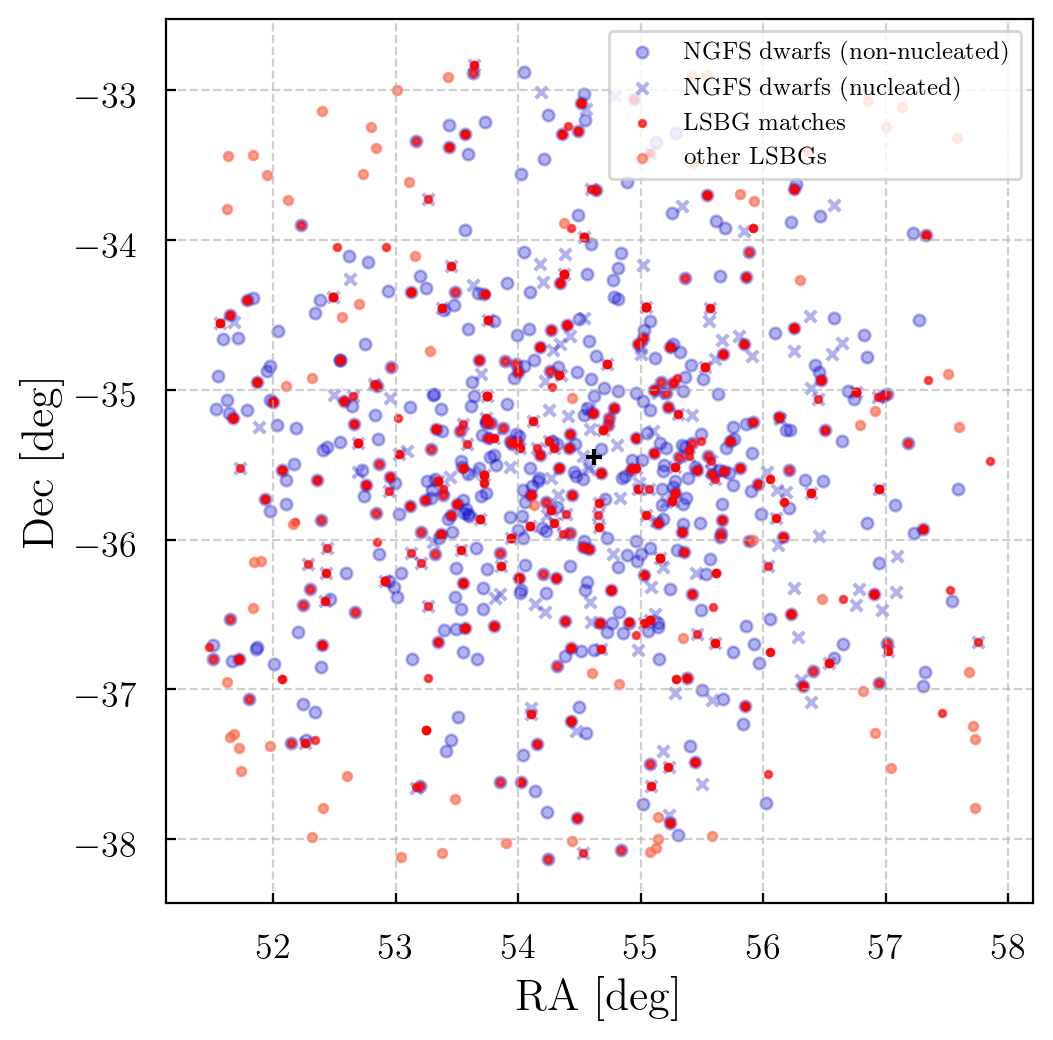

In [40]:
plot_pretty()
plt.figure(figsize=(5.35,5.3))

plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

plt.scatter(RA_F[type_F=='x'], DEC_F[type_F=='x'], marker='o',s=17,color='mediumblue',alpha=0.3, label='NGFS dwarfs (non-nucleated)')
plt.scatter(RA_F[type_F=='o'], DEC_F[type_F=='o'], marker='x',s=17,color='mediumblue',alpha=0.3, label='NGFS dwarfs (nucleated)')
plt.scatter(RA_LSB[idx_LSB_all], DEC_LSB[idx_LSB_all], s=6.0, color='red', alpha=0.65, label='LSBG matches')
plt.scatter(ra_not, dec_not, s=10.0, color='tomato', alpha=0.6, label='other LSBGs')
plt.scatter(54.6162,-35.4483, s=33, marker='+', color='k')

plt.grid(ls='--',alpha=0.6)

plt.xlabel('RA [deg]', fontsize=16)
plt.ylabel('Dec [deg]', fontsize=16)

plt.legend(frameon=True,loc='upper right', fontsize=8.5)

plt.tight_layout()
plt.savefig('Fornax_efficiency.pdf')
plt.show()

In [41]:
mag_yes = mag_g[idx_LSB_all]
#print(len(mag_yes))
small_box = (ra_not>53)&(ra_not<57)&(dec_not>-37)&(dec_not<-34)
small_box = ((ra_not-54.6162)**2.0 + (dec_not+35.4483)**2.0)<2.114**2.0
mag_not2 = mag_not[small_box]
print(len(mag_not2))

11
